Fuel Efficiency Predictor

Load the data

In [1]:
import pandas as pd

data = pd.read_csv('auto_mpg.csv')
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,country
0,18,8,307,130,3504,12,70,American
1,15,8,350,165,3693,12,70,American
2,18,8,318,150,3436,11,70,American
3,16,8,304,150,3433,12,70,American
4,17,8,302,140,3449,11,70,American
5,15,8,429,198,4341,10,70,American
6,14,8,454,220,4354,9,70,American
7,14,8,440,215,4312,9,70,American
8,14,8,455,225,4425,10,70,American
9,15,8,390,190,3850,9,70,American


Clean the data

In [2]:
import numpy as np

def check_int(value):
    try:
        int(value)
        return np.NaN
    except ValueError:
        return value

In [3]:
null_values = data['horsepower'].apply(check_int).dropna()
print(null_values)

32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: horsepower, dtype: object


In [4]:
data = data.drop([32, 126, 330, 336, 354, 374])

In [5]:
data['horsepower'] = data['horsepower'].astype(int)

Explore the data

In [6]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.492347,5.471939,194.413265,104.469388,2977.584184,15.681122,75.979592
std,7.799924,1.705783,104.642823,38.491160,849.402560,2.761232,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,14.000000,73.000000
50%,23.000000,4.000000,151.000000,93.500000,2803.500000,16.000000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.000000,79.000000
max,47.000000,8.000000,455.000000,230.000000,5140.000000,25.000000,82.000000


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

continous_features = ['horsepower', 'displacement', 'weight', 'acceleration', ]
discrete_features = ['model_year', 'cylinders']
categorical_features = ['model_year', 'cylinders', 'country']
label = data['mpg']

C:\Users\MANDEE~1\AppData\Local\Temp/ipykernel_18876/2446325416.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


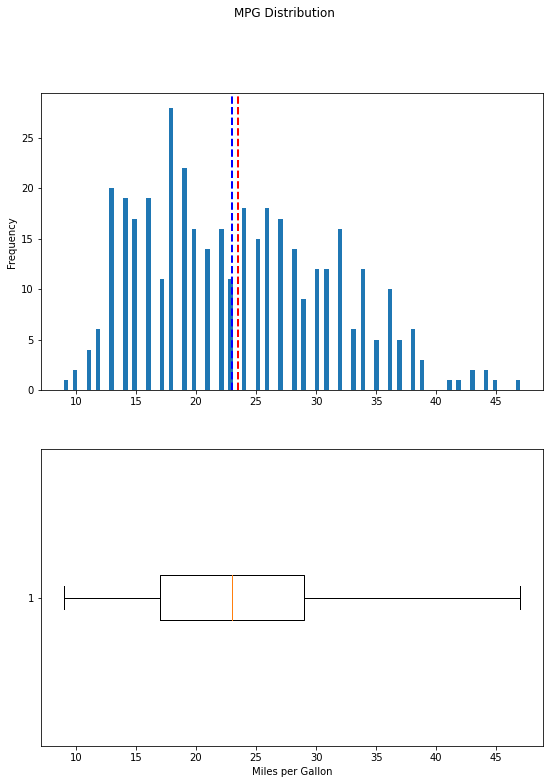

In [8]:
# Explore the Label
fig, ax = plt.subplots(2, 1, figsize=(9, 12))

ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')
ax[0].axvline(label.mean(), color='red', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='blue', linestyle='dashed', linewidth=2)

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Miles per Gallon')

fig.suptitle('MPG Distribution')

fig.show()

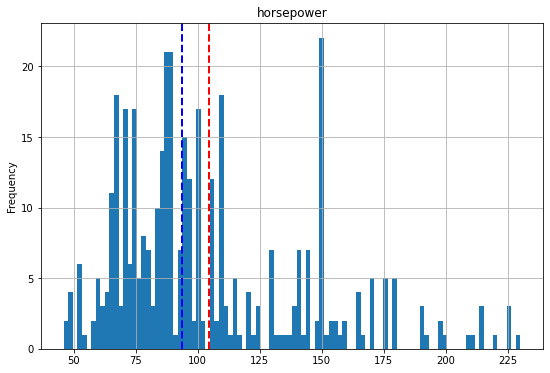

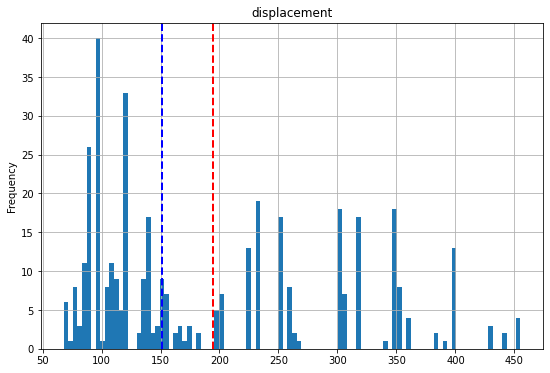

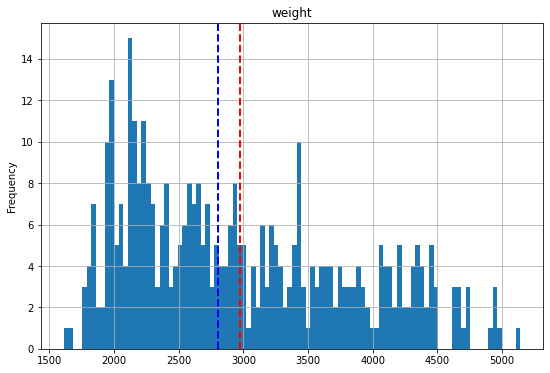

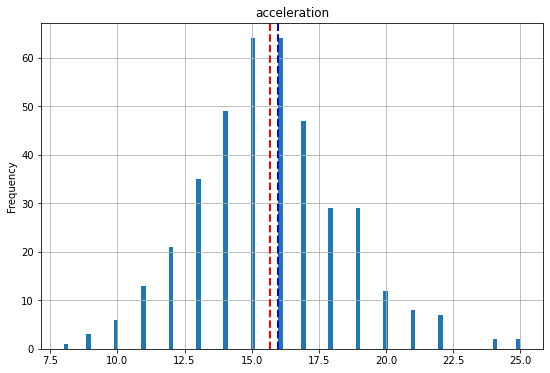

In [9]:
#Explore the numeric features
for col in continous_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax=ax)
    ax.set_ylabel('Frequency')
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

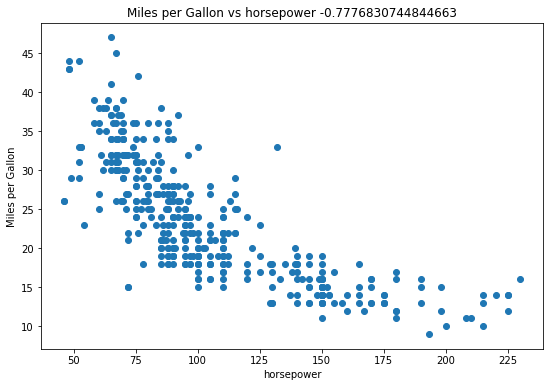

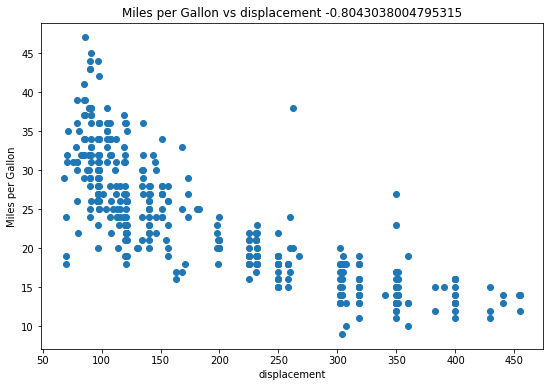

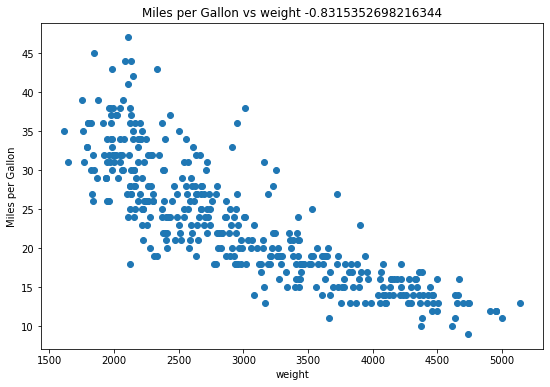

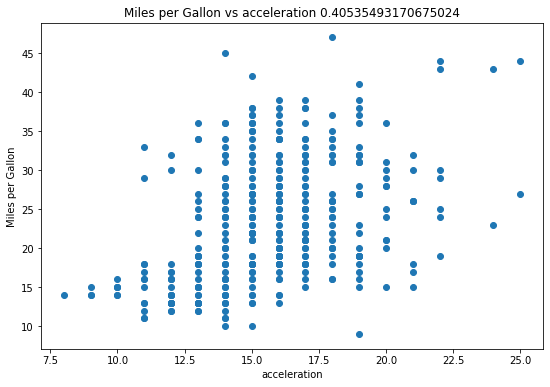

In [10]:
for col in continous_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = data[col]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Miles per Gallon')
    ax.set_title('Miles per Gallon vs ' + col + ' ' + str(correlation))
plt.show()

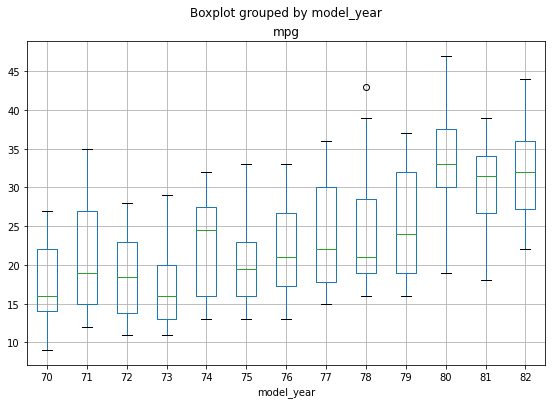

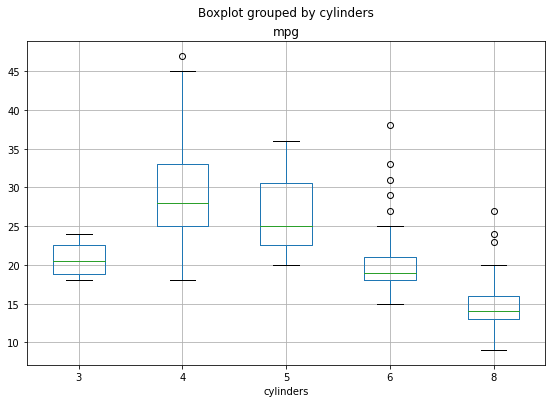

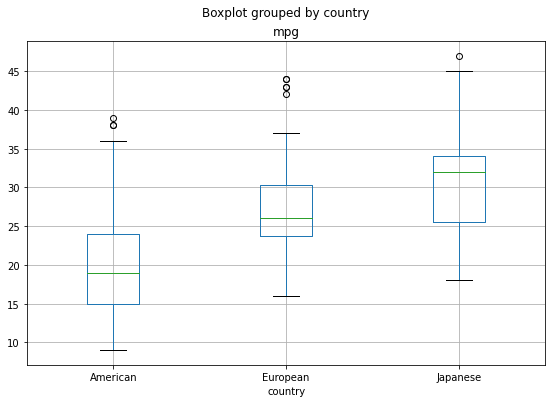

In [11]:
for col in categorical_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    data.boxplot(column = 'mpg', by = col, ax = ax)
    ax.set_xlabel(col)
plt.show()

Split the data

In [28]:
from sklearn.model_selection import train_test_split

features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'country']
label = ['mpg']

X, y = data[features].values, data[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print('Training set: ', X_train.shape[0], '\nTest set: ', X_test.shape[0])

Training set:  274 
Test set:  118


Create evaluation function

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate(predicted_values, actual_values):
    plt.scatter(predicted_values, actual_values)
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.title('Actual vs Predicted Values')
    plt.show()
    mse = mean_squared_error(actual_values, predicted_values)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual_values, predicted_values)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('r2:', r2)

Preprocess the data

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

categorical_features = [6]

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

Find best model using evaluate function

<class 'sklearn.linear_model._base.LinearRegression'>


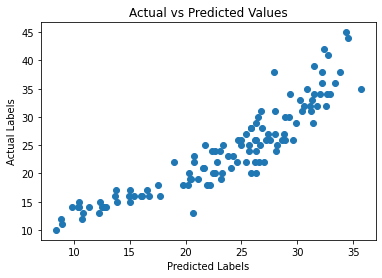

MSE: 10.936068463369475
RMSE: 3.3069727037533094
r2: 0.8229812647751701


<class 'sklearn.linear_model._coordinate_descent.Lasso'>


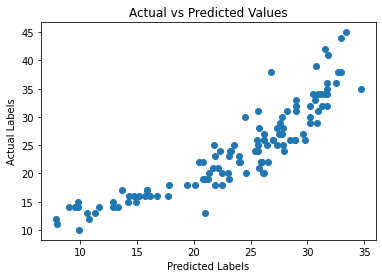

MSE: 12.833980808568926
RMSE: 3.5824545787167947
r2: 0.79226034856656




C:\ProgramData\Miniconda3\lib\site-packages\sklearn\pipeline.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


<class 'sklearn.ensemble._forest.RandomForestRegressor'>


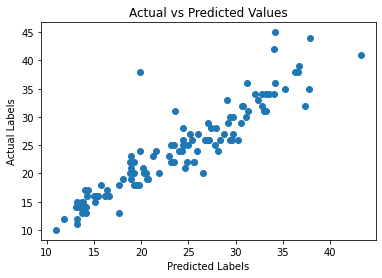

MSE: 9.181721186440678
RMSE: 3.0301355062836177
r2: 0.8513783379232818


<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


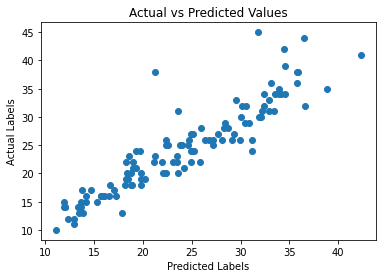

MSE: 9.810699097948985
RMSE: 3.1322035530835133
r2: 0.8411972683046621




In [69]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

model_list = [LinearRegression, Lasso, RandomForestRegressor, GradientBoostingRegressor]

for model in model_list:
    if model == RandomForestRegressor or model == GradientBoostingRegressor:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model(random_state=0))])
    else:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model())])
    trained_model = pipeline.fit(X_train, y_train)
    predictions = trained_model.predict(X_test)
    print(str(model))
    evaluate(predictions, y_test)
    print('\n')

Tune the best model using randomgridsearch 

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\pipeline.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


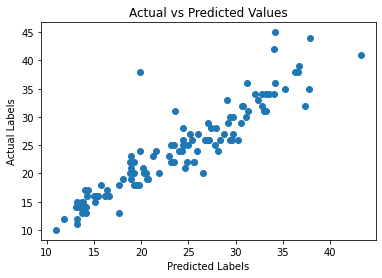

MSE: 9.181721186440678
RMSE: 3.0301355062836177
r2: 0.8513783379232818


In [70]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('reg', RandomForestRegressor(random_state=0))])
model = pipeline.fit(X_train, y_train)
predictions = model.predict(X_test)
evaluate(predictions, y_test)

In [54]:
from pprint import pprint

pprint(pipeline[1].get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [61]:
# from sklearn.model_selection import RandomizedSearchCV

# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]

# random_grid = {'reg__n_estimators' : n_estimators,
#                'reg__max_features' : max_features,
#                'reg__max_depth' : max_depth,
#                'reg__min_samples_split' : min_samples_split,
#                'reg__min_samples_leaf' : min_samples_leaf,
#                'reg__bootstrap' : bootstrap}

# print(random_grid)

In [60]:
# search = RandomizedSearchCV(estimator=pipeline,
#                             param_distributions=random_grid,
#                             n_iter=100,
#                             cv=3,
#                             verbose=2,
#                             random_state=42,
#                             n_jobs=1)
# search.fit(X_train, y_train)
# print(search.best_params_)

Best Parameters:
{'reg__n_estimators': 200, 'reg__min_samples_split': 2, 'reg__min_samples_leaf': 1, 'reg__max_features': 'sqrt', 'reg__max_depth': 50, 'reg__bootstrap': True}

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\pipeline.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


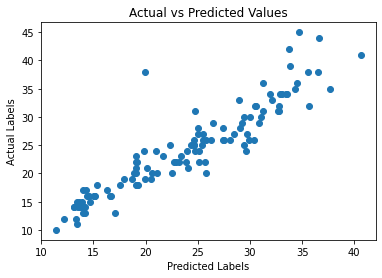

MSE: 9.146147292843692
RMSE: 3.0242597925515082
r2: 0.8519541614628521


In [71]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('reg', RandomForestRegressor(random_state=0,
                                                         n_estimators=200,
                                                         min_samples_split=2,
                                                         min_samples_leaf=1,
                                                         max_features='sqrt',
                                                         max_depth=50,
                                                         bootstrap=True))])
model = pipeline.fit(X_train, y_train)
predictions = model.predict(X_test)
evaluate(predictions, y_test)

Save the model

In [72]:
# import joblib
# filename = 'fuel_efficiency_model'
# joblib.dump(model, filename)

['fuel_efficiency_model']

Use the model to predict fuel efficiency of a new car

In [73]:
data.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,country
228,19,6,250,98,3525,19,77,American


In [83]:
loaded_model = joblib.load(filename)

#Data for Dodge Challenger 1978, BMW 316 1975, Mercedes-Benz 500 SEL 1980
new_data = np.array([[4, 98, 77, 2529, 15, 78, 'American'],
                     [4, 96, 89, 2249, 13, 75, 'European'],
                     [8, 303, 237, 3649, 8, 80, 'European']
                    ])

results = loaded_model.predict(new_data)
print('Predictions')
for prediction in results:
    print(prediction)

Predictions
28.88
26.651666666666664
17.845
